In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Xavier-code-lab/california-housing-prediction/main/housing.csv')

data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# It is very important to always run this command and check if there are any missing values in any field, because then those values must be filled in or removed.
data.info()
# Here, for example, there are missing values in the 'total_bedrooms' field

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# We find the diferent values of a variable and how many of each there are
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
data.dropna(inplace=True)
data.info()
# The NaN values are dropped, so all we have now is complete

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_test.ocean_proximity.value_counts()
# Careful here, it is possible that no ISLAND value appears on the training. If that happens, the program may give problems later.

ocean_proximity
<1H OCEAN     1807
INLAND        1294
NEAR OCEAN     534
NEAR BAY       451
ISLAND           1
Name: count, dtype: int64

In [ ]:
# We put it all together again.
# From now on, whatever we do to training data, we must do to testing as well, otherwise they won't mach later.
train_data = X_train.join(y_train)
test_data = X_test.join(y_test)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

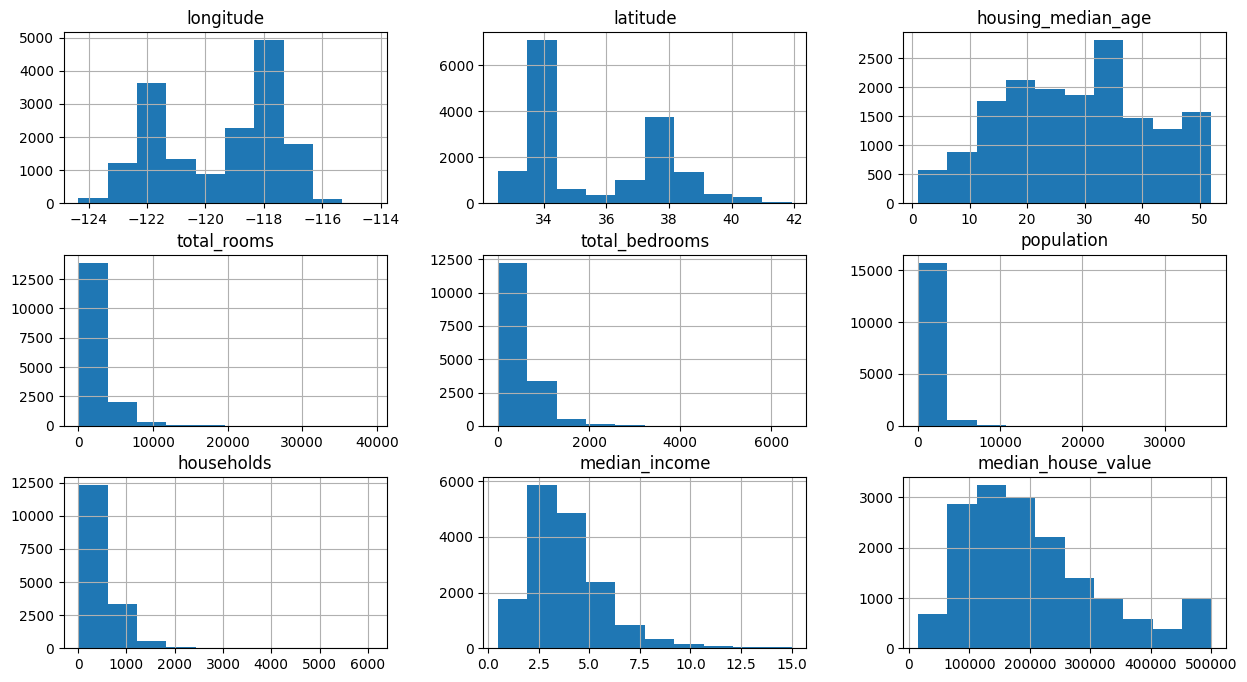

In [11]:
train_data.hist(figsize=(15,8))

<Axes: >

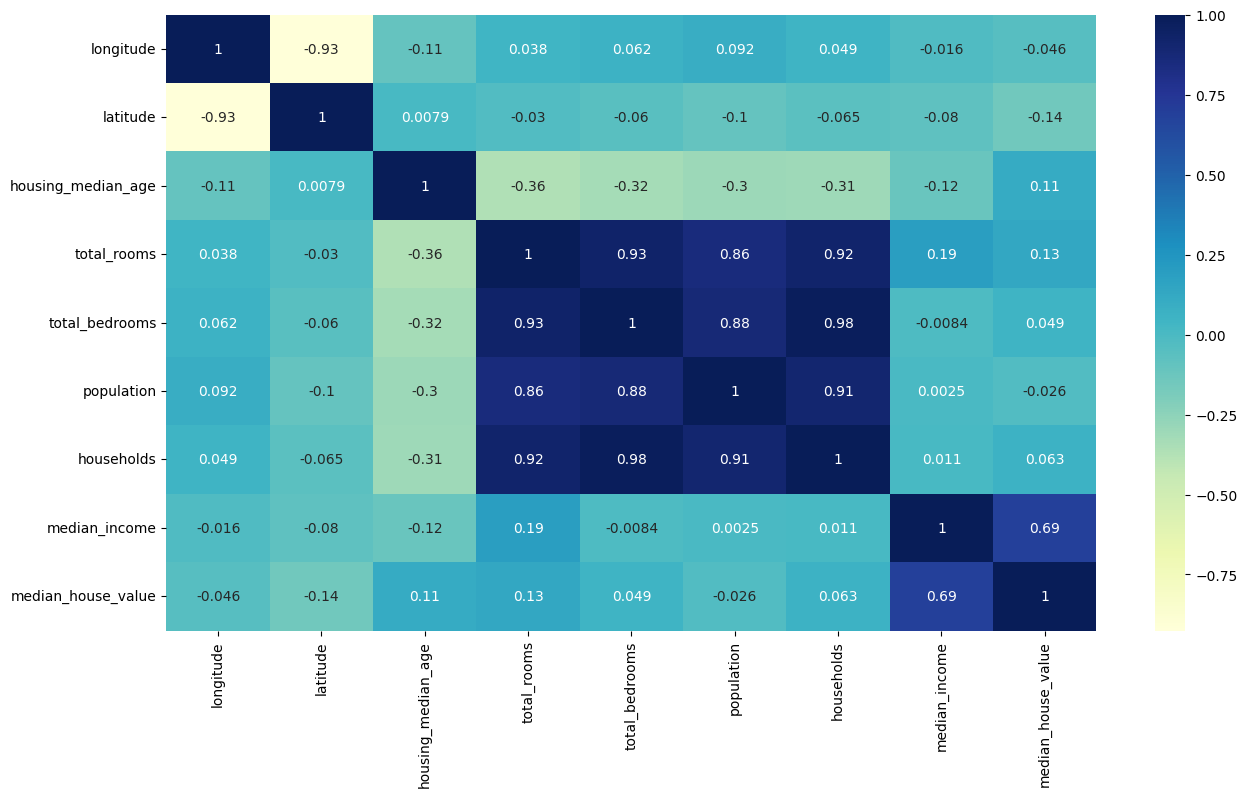

In [12]:
train_data_heatmap = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15,8))
sns.heatmap(train_data_heatmap.corr(), annot=True, cmap='YlGnBu')


In [ ]:
# We change it to the Log of the values to get more gausian profiles
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

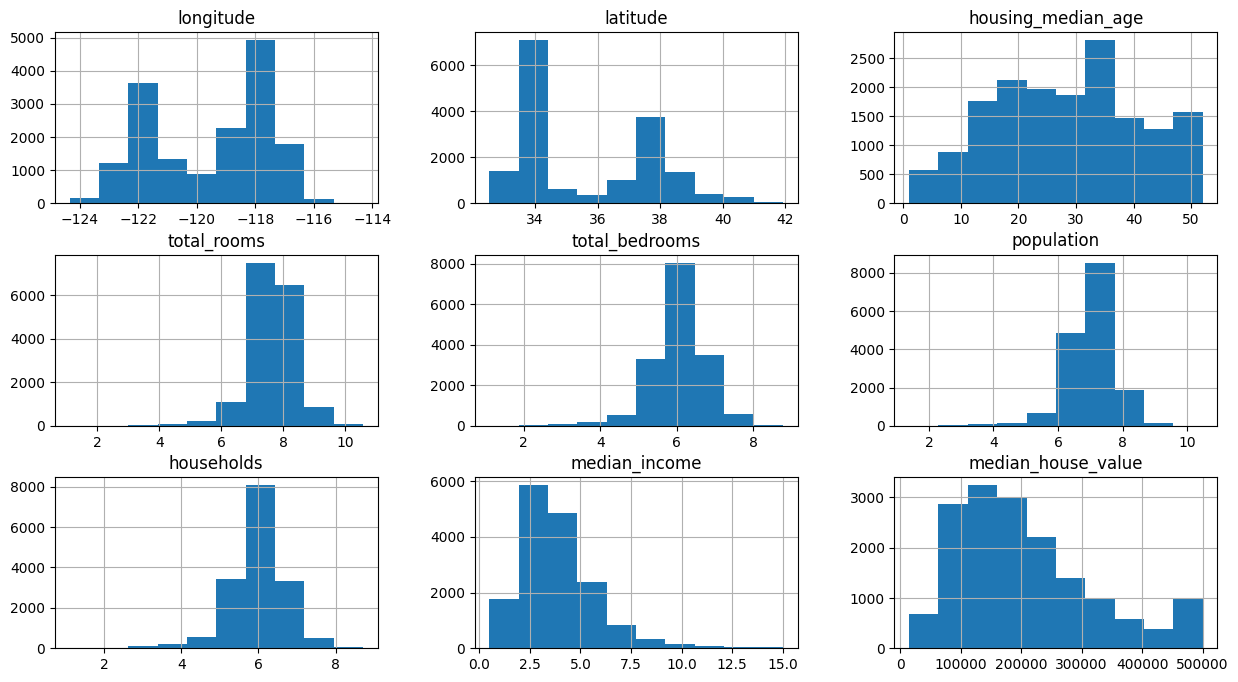

In [14]:
train_data.hist(figsize=(15,8))

In [ ]:
######################################################################################################################################################
# Here are some piplines to change the Ocean_proximity variables into something useful:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, Y=None):
        return self
    
    def transform(self,X):
        encoder = OneHotEncoder()
        #######################################################
        matrix = encoder.fit_transform(X[['ocean_proximity']]).toarray()

        column_names = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        #############
        return X    

In [16]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, Y=None):
        return self
    
    def transform(self,X):
        return X.drop(['ocean_proximity'], axis =1, errors='ignore')

In [17]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('FeatureEncoder', FeatureEncoder()),
                     ('FeatureDropper', FeatureDropper())])

In [18]:
train_data_clean = pipeline.fit_transform(train_data)
test_data_clean = pipeline.fit_transform(test_data)

train_data_clean
#################################################################################################

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,<1H OCEAN,INLAND,NEAR OCEAN,ISLAND
15542,-117.10,33.07,16.0,7.784473,5.820083,6.985642,5.902633,8.6803,347300.0,1.0,0.0,0.0,0.0,0.0
9353,-122.56,37.95,34.0,7.892826,6.021023,6.839476,6.018593,6.1444,500001.0,0.0,0.0,0.0,0.0,1.0
4755,-118.33,34.04,52.0,7.842279,5.996452,6.912743,5.921578,3.6373,420000.0,1.0,0.0,0.0,0.0,0.0
18005,-121.96,37.30,23.0,8.304247,6.738152,7.687997,6.738152,4.0403,303400.0,1.0,0.0,0.0,0.0,0.0
4993,-118.31,33.99,44.0,7.440734,5.883322,6.672033,5.521461,1.7083,100000.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,-122.14,37.74,52.0,6.977281,5.308268,6.089045,5.262690,4.0662,204200.0,0.0,0.0,0.0,1.0,0.0
8971,-118.40,34.01,48.0,7.264030,5.537334,6.542472,5.594711,5.7405,351600.0,1.0,0.0,0.0,0.0,0.0
8168,-118.15,33.80,44.0,7.542744,5.991465,7.063048,5.921578,3.1042,219800.0,0.0,0.0,0.0,0.0,1.0
11379,-117.95,33.68,26.0,7.718685,5.843544,7.179308,5.924256,5.0287,265000.0,1.0,0.0,0.0,0.0,0.0


<Axes: >

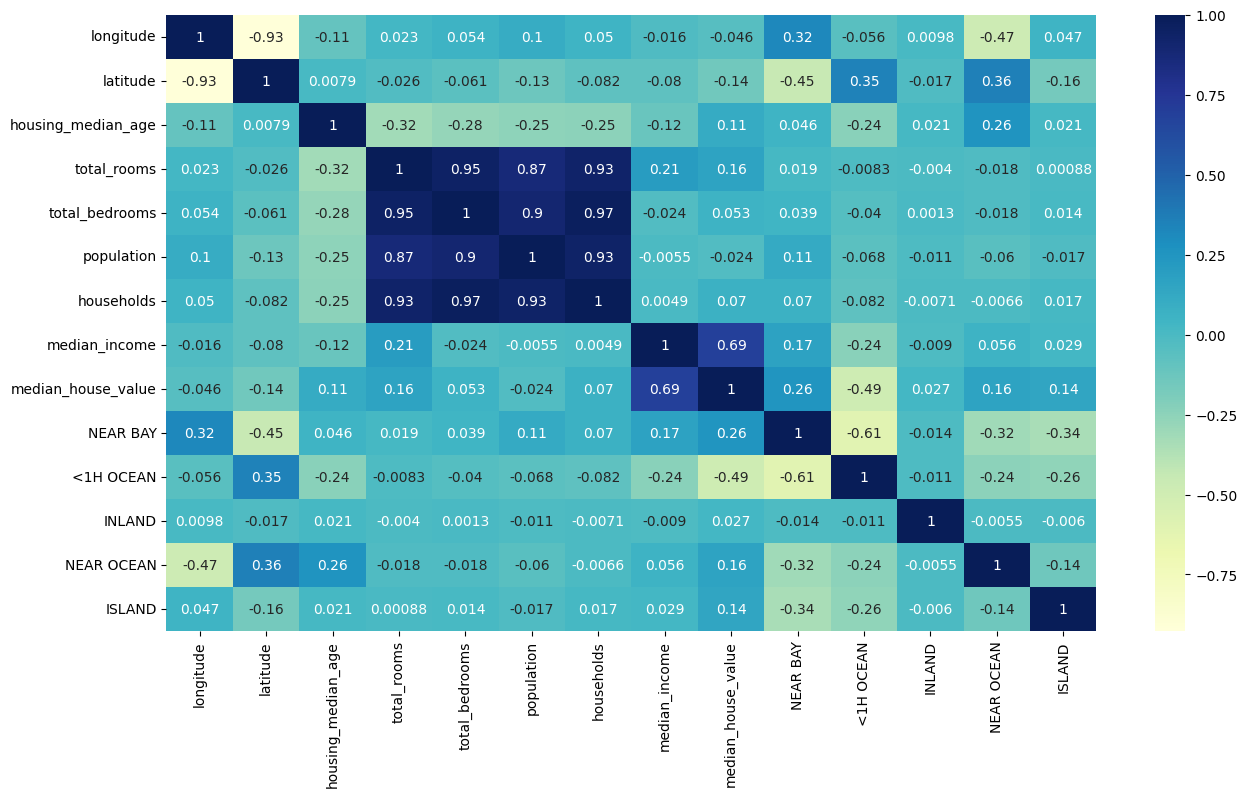

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_clean.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='latitude', ylabel='longitude'>

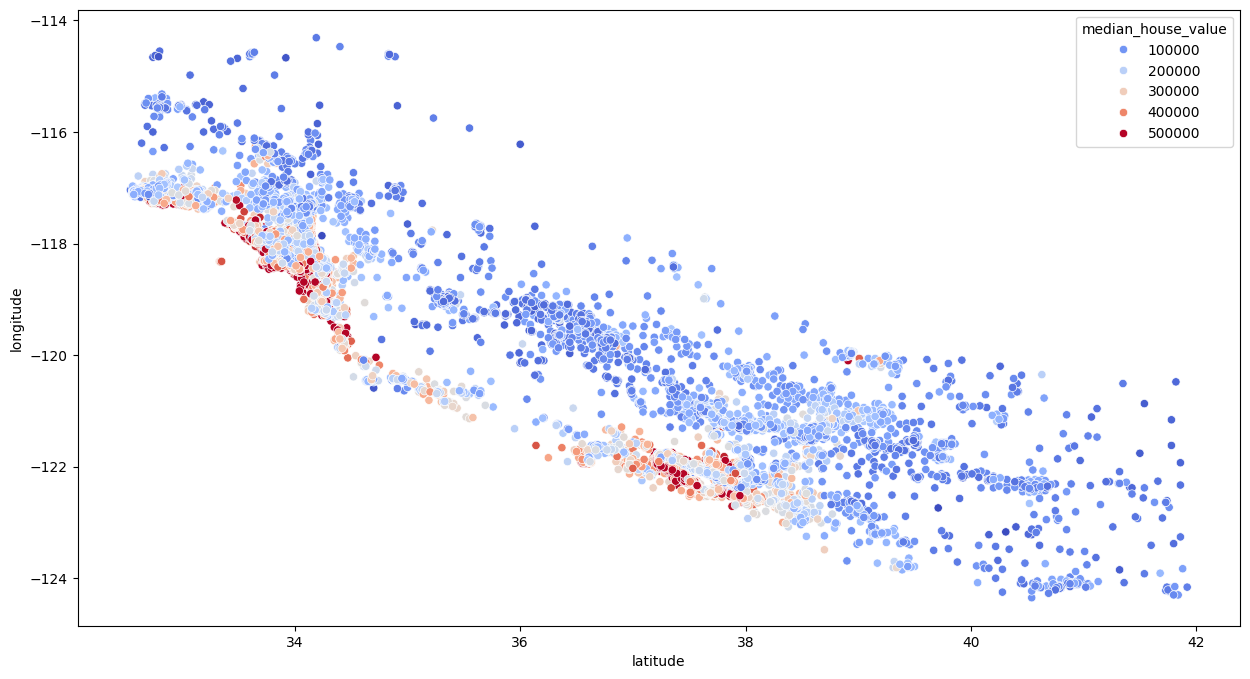

In [20]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = train_data_clean, hue = 'median_house_value', palette = 'coolwarm')

In [ ]:
# Now we try to combine data that we already have to obtain more data:

train_data_clean['bedroom_ratio'] = train_data_clean['total_bedrooms']/train_data_clean['total_rooms']
train_data_clean['household_rooms'] = train_data_clean['total_rooms']/train_data_clean['households']

test_data_clean['bedroom_ratio'] = test_data_clean['total_bedrooms']/test_data_clean['total_rooms']
test_data_clean['household_rooms'] = test_data_clean['total_rooms']/test_data_clean['households']

<Axes: >

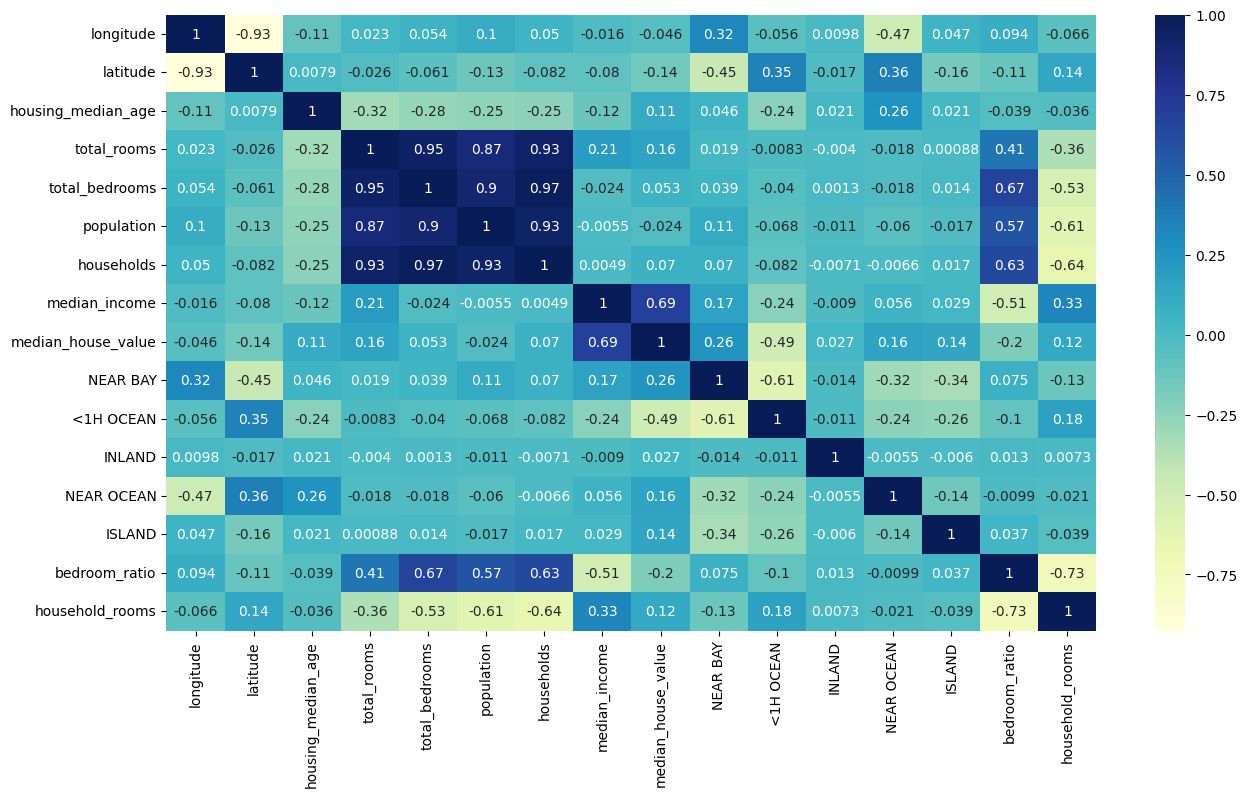

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_clean.corr(), annot=True, cmap='YlGnBu')

In [ ]:
# We start with a simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_clean.drop(['ISLAND'], axis=1)

X_train, y_train = train_data_clean.drop(['median_house_value'], axis=1), train_data_clean['median_house_value']
X_train_s = scaler.fit_transform(X_train)


reg = LinearRegression()

reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
X_test, y_test = test_data_clean.drop(['median_house_value'], axis=1), test_data_clean['median_house_value']

In [ ]:
reg.score(X_test, y_test)
# If all Island values are either in the training data or the test data, here an error may happen

0.671221352539652

In [ ]:
# We try a random forest regression now
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
forest.score(X_test,y_test)
# The score is way better than with the linear regression

0.8257555959531468

In [ ]:
# We play here with hyperparameters
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
'n_estimators': [20, 30, 50], # those are random, they can be changed to try to improve the result
'max_features': [8,10,20,30]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_features': [8, 10, ...], 'n_estimators': [20, 30, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


In [29]:
best_forest = grid_search.best_estimator_

In [30]:
grid_search.best_estimator_

,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,10
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
best_forest.score(X_test, y_test)
# There is a light improvement

0.826194952200186